In [201]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm_notebook as tqdm

#Diretórios
TRAIN_DIR = './cat_dog/train'
TEST_DIR = './cat_dog/test'

#tamanho da imagem e passo de learning rate
IMG_SIZE = 50
LR = 1e-3

#nome do modelo que sera salvo e usado no tensorboard
MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, 'do_colab')

%matplotlib inline

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [203]:
figsize(5,10)

In [158]:
#nome dos arquivos e classificação
#estao originalmente como dog.99.png
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat': return [1,0]
    elif word_label == 'dog': return [0,1]

In [159]:
#criar data set de treino
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    
    #embaralhamento
    shuffle(training_data)
    
    #salvando
    np.save('training_data.npy', training_data)
    
    return training_data

In [160]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    np.save('test_data.npy',testing_data)
    return testing_data

In [212]:
train_data = create_train_data()
test_data = process_test_data()
#se vc ja treinou, use
#train_data = np.Load('train_data.npy')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [216]:
import tensorflow as tf
tf.reset_default_graph()
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')



In [ ]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('modelo carregado!')

In [217]:
train = train_data
test = test_data

In [218]:
X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #features
Y = [i[1] for i in train] #labels

test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #features
test_y = [i[1] for i in test] #labels

In [219]:
model.fit({'input': X}, {'targets': Y}, n_epoch=10, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 390  | total loss: 0.59442 | time: 29.977s
| Adam | epoch: 001 | loss: 0.59442 - acc: 0.6874 -- iter: 24960/25000


ValueError: Cannot feed value of shape (64,) for Tensor 'targets/Y:0', which has shape '(?, 2)'

In [130]:
model.save(MODEL_NAME)

INFO:tensorflow:/home/jimitogni/Disciplinas/machinelearning/dogsvscats-0.001-6conv128-basic-size100.model is not in all_model_checkpoint_paths. Manually adding it.


In [220]:
import tensorflow as tf
tf.reset_default_graph()
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')



if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

train = train_data[:-500]
test = train_data[-500:]

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

model.fit({'input': X}, {'targets': Y}, n_epoch=20, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

model.save(MODEL_NAME)

Training Step: 19149  | total loss: 0.06974 | time: 27.813s
| Adam | epoch: 020 | loss: 0.06974 - acc: 0.9730 -- iter: 24448/24500
Training Step: 19150  | total loss: 0.06323 | time: 28.885s
| Adam | epoch: 020 | loss: 0.06323 - acc: 0.9757 | val_loss: 0.42391 - val_acc: 0.8860 -- iter: 24500/24500
--
INFO:tensorflow:/home/jimitogni/Disciplinas/machinelearning/dogsvscats-0.001-do_colab.model is not in all_model_checkpoint_paths. Manually adding it.


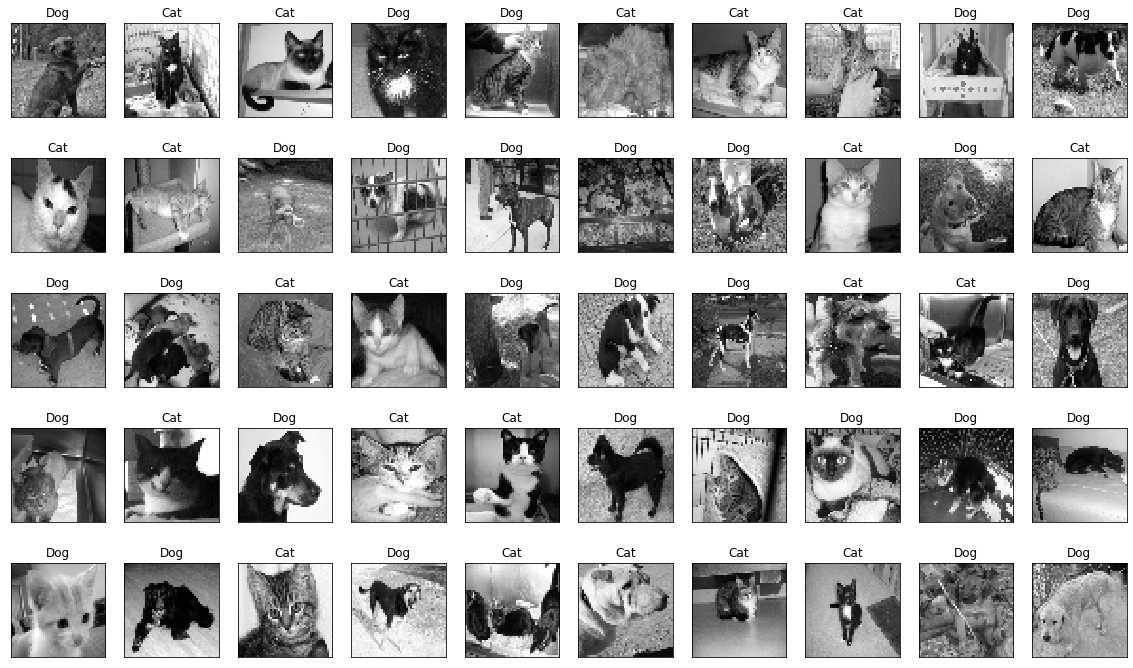

In [245]:
import matplotlib.pyplot as plt

#se ainda nao tiver o arquivo
#test_data = process_test_data()

#se ja tiver
test_data = np.load('test_data.npy',allow_pickle=True)

figsize(20,12)

fig = plt.figure()
for num, data in enumerate(test_data[:50]):
    #gato: [1,0] - cachorro: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(5,10,num+1)
    orig = img_data
    data = img_data.reshape(50,50,1)
    
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label = 'Cat'
        
    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

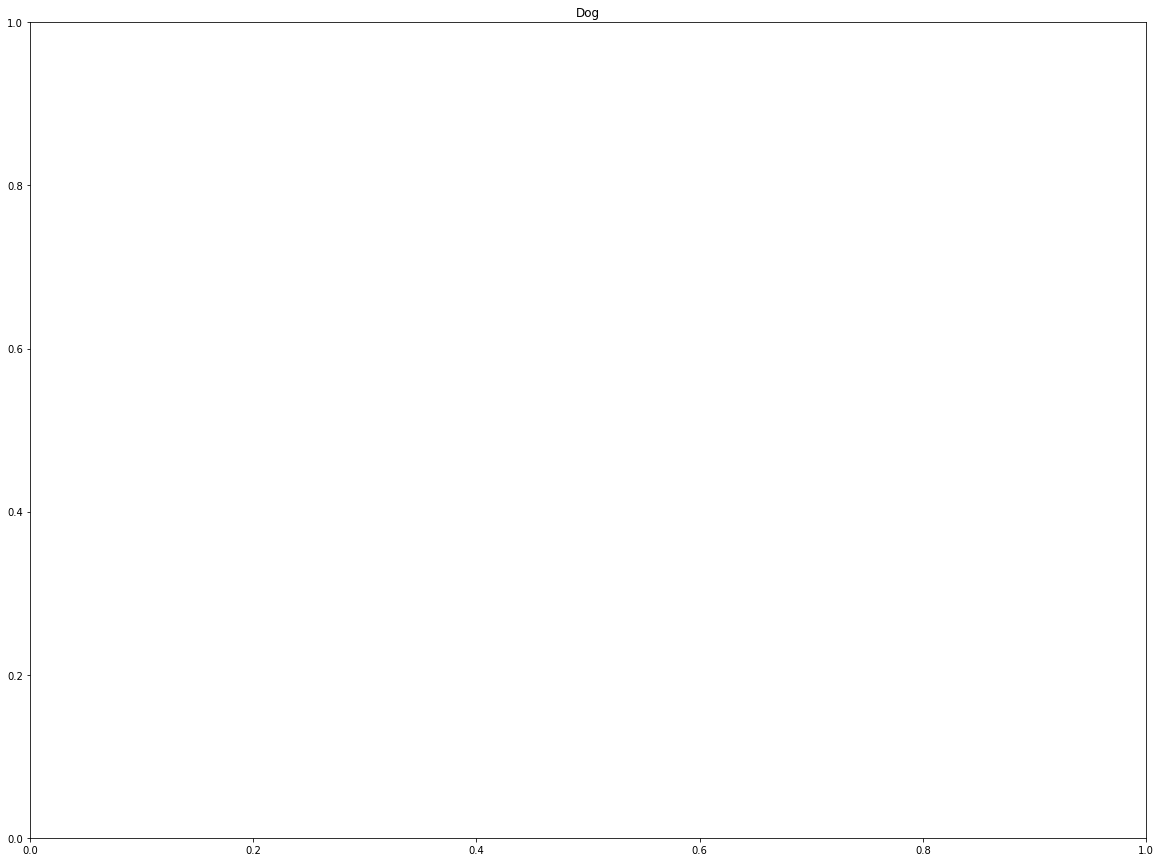

In [222]:
import matplotlib.pyplot as plt

# if you need to create the data:
#test_data = process_test_data()
#if you already have some saved:
test_data = np.load('test_data.npy',allow_pickle=True)

#figsize(5,10)

for num,data in enumerate(test_data[1122:1128]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(2,3,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)


plt.show()